<a href="https://colab.research.google.com/github/tyrypic/python-pil-labworks/blob/main/variant2_lab6_perlik_k_4_101_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №6: «Классификация изображений»  
**Вариант 2: сверточная нейронная сеть**

**Задание:**
1. Загрузить набор MNIST (60 000 тренировочных и 10 000 тестовых изображений 28×28).
2. Построить эталонную полносвязную сеть (Dense) для классификации цифр, оценить точность на тестовой выборке.
3. Построить сверточную нейронную сеть (CNN) для той же задачи, оценить точность.
4. Сравнить результаты Dense vs CNN.
5. Проверить работу CNN на собственных изображениях из папки `images/` (0.jpg–9.jpg).  
   Предварительная обработка: преобразовать в градации серого, изменить размер до 28×28, нормализовать, инвертировать цвета.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


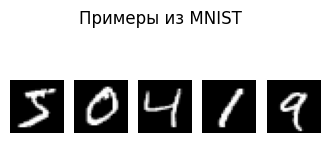

In [ ]:
# 1. Импорты и загрузка MNIST
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import Image
import os

# Параметры
img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 5

# Загрузка данных
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Визуализация примера
plt.figure(figsize=(4,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.suptitle('Примеры из MNIST')
plt.show()

In [ ]:
# 2. Предобработка данных для Dense (Flatten)
x_train_flat = x_train.reshape(-1, img_rows*img_cols).astype('float32') / 255
x_test_flat  = x_test.reshape(-1, img_rows*img_cols).astype('float32') / 255

y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat  = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# 3. Полносвязная модель (Dense)
dense_model = models.Sequential([
    layers.Input(shape=(img_rows*img_cols,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

dense_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

history_dense = dense_model.fit(x_train_flat, y_train_cat,
                                batch_size=batch_size,
                                epochs=epochs,
                                validation_split=0.1)

score_dense = dense_model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"Dense Test loss: {score_dense[0]:.4f}, accuracy: {score_dense[1]:.4f}")

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8719 - loss: 0.4475 - val_accuracy: 0.9700 - val_loss: 0.0993
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9717 - loss: 0.0932 - val_accuracy: 0.9758 - val_loss: 0.0829
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9823 - loss: 0.0570 - val_accuracy: 0.9795 - val_loss: 0.0726
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9879 - loss: 0.0361 - val_accuracy: 0.9770 - val_loss: 0.0783
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9928 - loss: 0.0245 - val_accuracy: 0.9797 - val_loss: 0.0728
Dense Test loss: 0.0763, accuracy: 0.9769


In [ ]:
# 4. Подготовка данных для CNN
x_train_cnn = x_train.reshape(-1, img_rows, img_cols, 1).astype('float32') / 255
x_test_cnn  = x_test.reshape(-1, img_rows, img_cols, 1).astype('float32') / 255

In [ ]:
# 5. Сверточная нейронная сеть (CNN)
cnn_model = models.Sequential([
    layers.Input(shape=(img_rows, img_cols, 1)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history_cnn = cnn_model.fit(x_train_cnn, y_train_cat,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split=0.1)

score_cnn = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)
print(f"CNN Test loss: {score_cnn[0]:.4f}, accuracy: {score_cnn[1]:.4f}")

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 60s 138ms/step - accuracy: 0.8584 - loss: 0.4935 - val_accuracy: 0.9835 - val_loss: 0.0555
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.9815 - loss: 0.0599 - val_accuracy: 0.9872 - val_loss: 0.0453
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 58s 138ms/step - accuracy: 0.9878 - loss: 0.0380 - val_accuracy: 0.9877 - val_loss: 0.0371
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 137ms/step - accuracy: 0.9919 - loss: 0.0265 - val_accuracy: 0.9910 - val_loss: 0.0348
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 57s 136ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9903 - val_loss: 0.0371
CNN Test loss: 0.0338, accuracy: 0.9887


Dense accuracy: 0.9769
CNN   accuracy: 0.9887


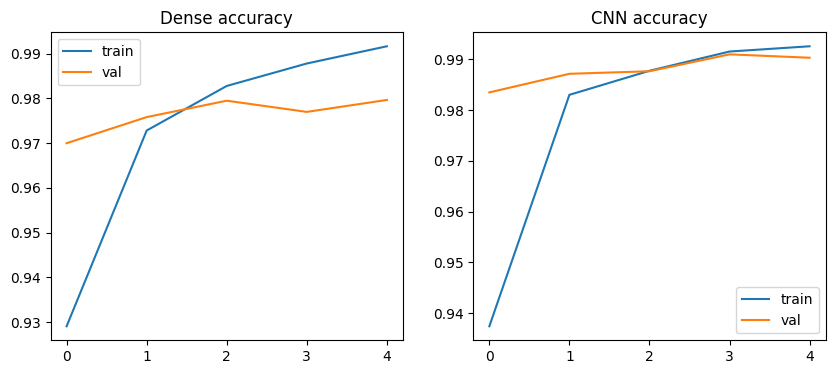

In [ ]:
# 6. Сравнение результатов
print(f"Dense accuracy: {score_dense[1]:.4f}")
print(f"CNN   accuracy: {score_cnn[1]:.4f}")

# Показать кривые обучения
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_dense.history['accuracy'], label='train')
plt.plot(history_dense.history['val_accuracy'], label='val')
plt.title('Dense accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='train')
plt.plot(history_cnn.history['val_accuracy'], label='val')
plt.title('CNN accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


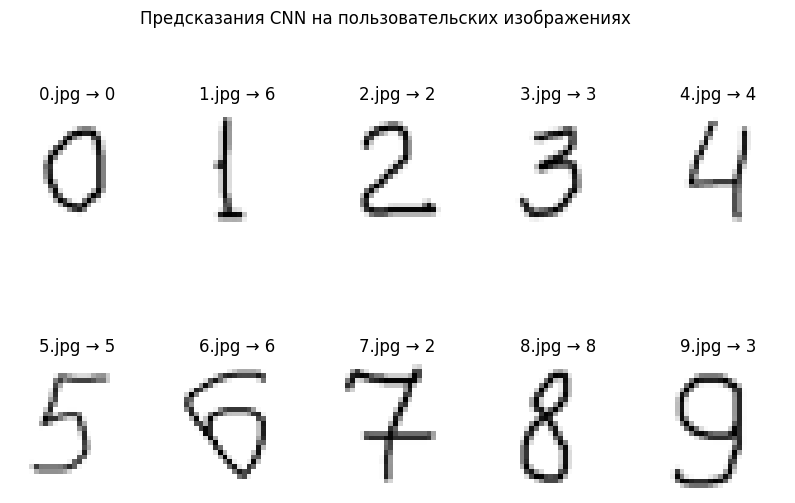

In [ ]:
# 7. Предсказания на собственных изображениях
img_dir = 'images'
custom_files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(('.png','.jpg'))])

plt.figure(figsize=(10,6))
for i, fname in enumerate(custom_files):
    path = os.path.join(img_dir, fname)
    img = Image.open(path).convert('L').resize((img_rows, img_cols))
    arr = np.array(img)
    # Инвертируем: фон белый -> цифра черная
    arr = 255 - arr
    arr = arr.astype('float32') / 255
    arr = arr.reshape(1, img_rows, img_cols, 1)
    pred = cnn_model.predict(arr)
    label = np.argmax(pred, axis=1)[0]
    plt.subplot(2,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{fname} → {label}")
    plt.axis('off')
plt.suptitle('Предсказания CNN на пользовательских изображениях')
plt.show()

## Лабораторная № 6: «Классификация изображений»

1. **Полносвязная сеть (Dense)**
   – Каждая нейронная ячейка связана со всеми предыдущими.
   – Быстро учится, но игнорирует пространственную структуру изображения (каждый пиксель отдельно).
   – Подходит для простых датасетов, но потребляет много параметров.

2. **Сверточная нейронная сеть (CNN)**
   – Использует свёрточные фильтры, которые «скользят» по изображению и обобщают локальные признаки.
   – Сохраняет пространственные зависимости, обладает меньшим числом параметров и лучше обобщает.
   – Обычно даёт более высокую точность на изображениях.

3. **Сравнение**
   – CNN показывает лучшую точность, особенно на более сложных или менее стандартизированных данных.
   – Dense быстрее обучается на маленьких наборах, но порой переобучается.

4. **Предсказания на своих изображениях**
   – Предобрабатываем: перевод в ч/б, инверсия (фон белый → цифры чёрные), нормализация и ресайз до 28×28.
   – Инверсия нужна, потому что MNIST цифры «белые по чёрному», а у нас наоборот.